In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
%matplotlib inline

In [180]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (20, 6)
chinese = FontProperties('simhei')

## 问题

- 使用 Python 2 和 Python 3 的开发者的比例？
- 做数据分析和机器学习的人中分别有多少人使用的是 Python 3？
- 常用框架中使用 Python 2 和 Python 3 的比例。
- 做数据分析和机器学习的人常用的框架？
- 公司规模大小和是否使用 Python 3 的关系？
- 开发者年龄和是否使用 Python 3 的关系？
- 使用 Python 3 和 Python 2 的开发者的国别分布？

## 读取数据集

In [183]:
survey_df = pd.read_csv('pythondevsurvey2017_raw_data.csv')
survey_df.columns = [c.lower() for c in survey_df.columns]
survey_df.head()

,is python the main language you use for your current projects?,none:what other language(s) do you use?,java:what other language(s) do you use?,javascript:what other language(s) do you use?,c/c++:what other language(s) do you use?,php:what other language(s) do you use?,c#:what other language(s) do you use?,ruby:what other language(s) do you use?,bash / shell:what other language(s) do you use?,objective-c:what other language(s) do you use?,...,technical support:which of the following best describes your job role(s)?,data analyst:which of the following best describes your job role(s)?,business analyst:which of the following best describes your job role(s)?,team lead:which of the following best describes your job role(s)?,product manager:which of the following best describes your job role(s)?,cio / ceo / cto:which of the following best describes your job role(s)?,systems analyst:which of the following best describes your job role(s)?,other - write in::which of the following best describes your job role(s)?,could you tell us your age range?,what country do you live in?
0,Yes,NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 or older,Italy
1,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Team lead,NaN,NaN,NaN,NaN,40-49,United Kingdom
2,Yes,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-49,France
3,"No, I don’t use Python for my current projects",NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 or younger,Spain
4,Yes,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-20,Israel


In [184]:
survey_df.shape

(9506, 162)

In [185]:
def find_cols(df, kws):
    '''找到 df 中含有 kws 的列'''
    return [item for item in df.columns if all ([w in item for w in kws])]

In [186]:
find_cols(df=survey_df, kws=['python', 'version'])

['which version of python do you use the most?',
 'installer from python.org:what do you typically use to upgrade your python version?',
 'build from source:what do you typically use to upgrade your python version?',
 'automatic upgrade via cloud provider:what do you typically use to upgrade your python version?',
 'enthought:what do you typically use to upgrade your python version?',
 'anaconda:what do you typically use to upgrade your python version?',
 'activepython:what do you typically use to upgrade your python version?',
 'intel distribution for python:what do you typically use to upgrade your python version?',
 'os-provided python (via apt-get, yum, homebrew, etc.):what do you typically use to upgrade your python version?',
 'pyenv:what do you typically use to upgrade your python version?',
 'pythonz:what do you typically use to upgrade your python version?',
 'other - write in::what do you typically use to upgrade your python version?']

## 使用 Python 2 和 Python 3 的开发者的比例？

In [189]:
python_version = survey_df['which version of python do you use the most?']
python_version.describe()

count         8112
unique           2
top       Python 3
freq          6046
Name: which version of python do you use the most?, dtype: object

In [190]:
python_version.value_counts(normalize=True, dropna=False)

Python 3    0.636019
Python 2    0.217336
NaN         0.146644
Name: which version of python do you use the most?, dtype: float64

In [191]:
python_version.value_counts(normalize=False, dropna=False)

Python 3    6046
Python 2    2066
NaN         1394
Name: which version of python do you use the most?, dtype: int64

大概有 64% 的人已经在使用 Python 3 了。

## 做数据分析和机器学习的人中分别有多少人使用的是 Python 3？

In [193]:
python_da_ml = survey_df[['machine learning:\xa0what do you use python for?', 'data analysis:\xa0what do you use python for?', 'which version of python do you use the most?']]

In [194]:
python_da_ml.dtypes

machine learning: what do you use python for?    object
data analysis: what do you use python for?       object
which version of python do you use the most?     object
dtype: object

In [196]:
python_da = pd.crosstab(python_da_ml['which version of python do you use the most?'], python_da_ml['data analysis:\xa0what do you use python for?'], normalize=True)

In [197]:
python_da

data analysis: what do you use python for?,Data analysis
which version of python do you use the most?,
Python 2,0.233177
Python 3,0.766823


In [198]:
python_ml = pd.crosstab(python_da_ml['which version of python do you use the most?'], python_da_ml['machine learning:\xa0what do you use python for?'], normalize=True)

In [199]:
pd.concat([python_da, python_ml], axis=1)

,Data analysis,Machine learning
which version of python do you use the most?,,
Python 2,0.233177,0.193548
Python 3,0.766823,0.806452


---

In [200]:
cols = find_cols(survey_df, 'what framework(s) do you use in addition to python?')
cols

['none:what framework(s) do you use in addition to python?',
 'django:what framework(s) do you use in addition to python?',
 'flask:what framework(s) do you use in addition to python?',
 'tornado:what framework(s) do you use in addition to python?',
 'bottle:what framework(s) do you use in addition to python?',
 'web2py:what framework(s) do you use in addition to python?',
 'numpy / pandas / matplotlib / scipy and similar:what framework(s) do you use in addition to python?',
 'keras / theano / tensorflow / scikit-learn and similar:what framework(s) do you use in addition to python?',
 'pillow:what framework(s) do you use in addition to python?',
 'pyqt / pygtk / wxpython:what framework(s) do you use in addition to python?',
 'tkinter:what framework(s) do you use in addition to python?',
 'pygame:what framework(s) do you use in addition to python?',
 'cherrypy:what framework(s) do you use in addition to python?',
 'twisted:what framework(s) do you use in addition to python?',
 'pyramid:

In [201]:
frameworks = survey_df[cols]
frameworks.head()

,none:what framework(s) do you use in addition to python?,django:what framework(s) do you use in addition to python?,flask:what framework(s) do you use in addition to python?,tornado:what framework(s) do you use in addition to python?,bottle:what framework(s) do you use in addition to python?,web2py:what framework(s) do you use in addition to python?,numpy / pandas / matplotlib / scipy and similar:what framework(s) do you use in addition to python?,keras / theano / tensorflow / scikit-learn and similar:what framework(s) do you use in addition to python?,pillow:what framework(s) do you use in addition to python?,pyqt / pygtk / wxpython:what framework(s) do you use in addition to python?,...,requests:what framework(s) do you use in addition to python?,asyncio:what framework(s) do you use in addition to python?,kivy:what framework(s) do you use in addition to python?,six:what framework(s) do you use in addition to python?,aiohttp:what framework(s) do you use in addition to python?,other - write in::what framework(s) do you use in addition to python?,"cloud platforms (google app engine, aws, rackspace, heroku and similar):what additional technology(s) do you use in addition to python?",jupyter notebook:what editor(s)/ide(s) have you considered for use in your python development?,komodo editor:what editor(s)/ide(s) have you considered for use in your python development?,komodo ide:what editor(s)/ide(s) have you considered for use in your python development?
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Django,Flask,Tornado,NaN,NaN,NumPy / pandas / Matplotlib / scipy and similar,NaN,Pillow,NaN,...,Requests,NaN,NaN,six,NaN,Other - Write In:,NaN,NaN,NaN,NaN
2,NaN,Django,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Requests,NaN,NaN,six,NaN,NaN,NaN,NaN,NaN,Komodo IDE
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NumPy / pandas / Matplotlib / scipy and similar,Keras / Theano / TensorFlow / scikit-learn and...,Pillow,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

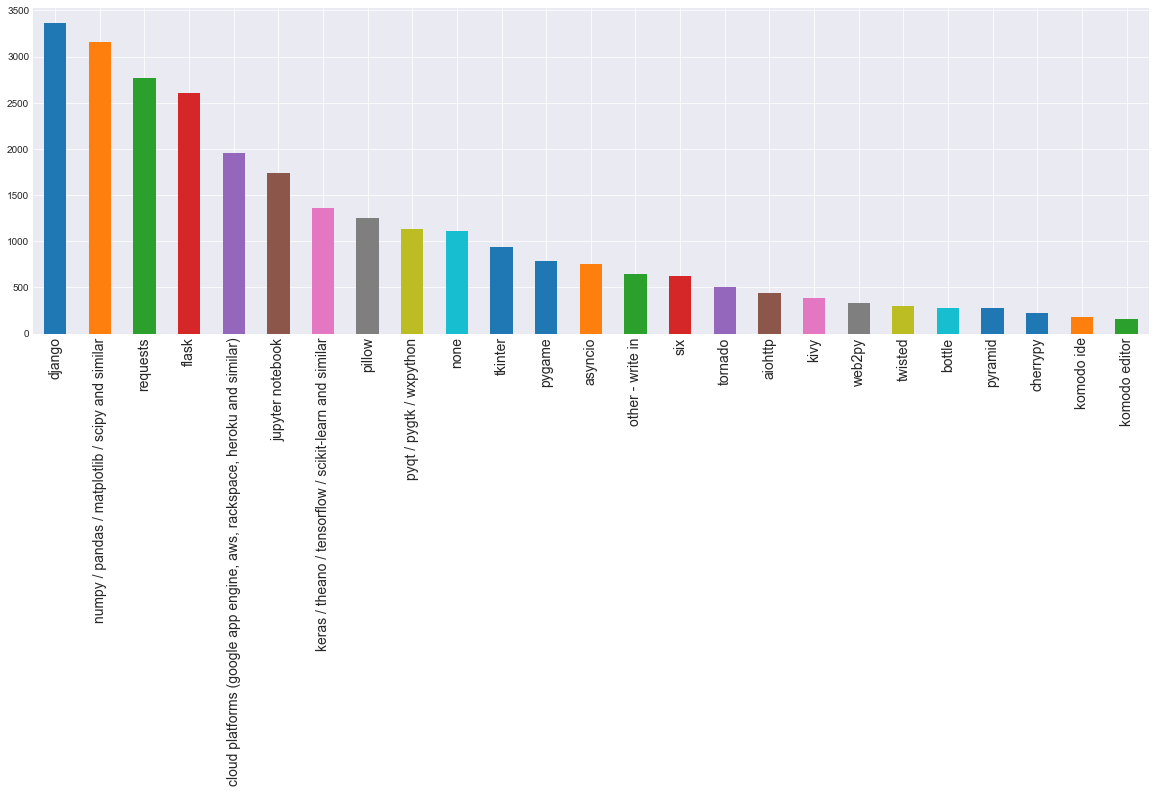

In [204]:
count_df = frameworks.count().sort_values(ascending=False)
count_df.index = [item.split(':')[0] for item in count_df.index]

count_df.plot(kind='bar')
plt.xticks(fontsize=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text yticklabel objects>)

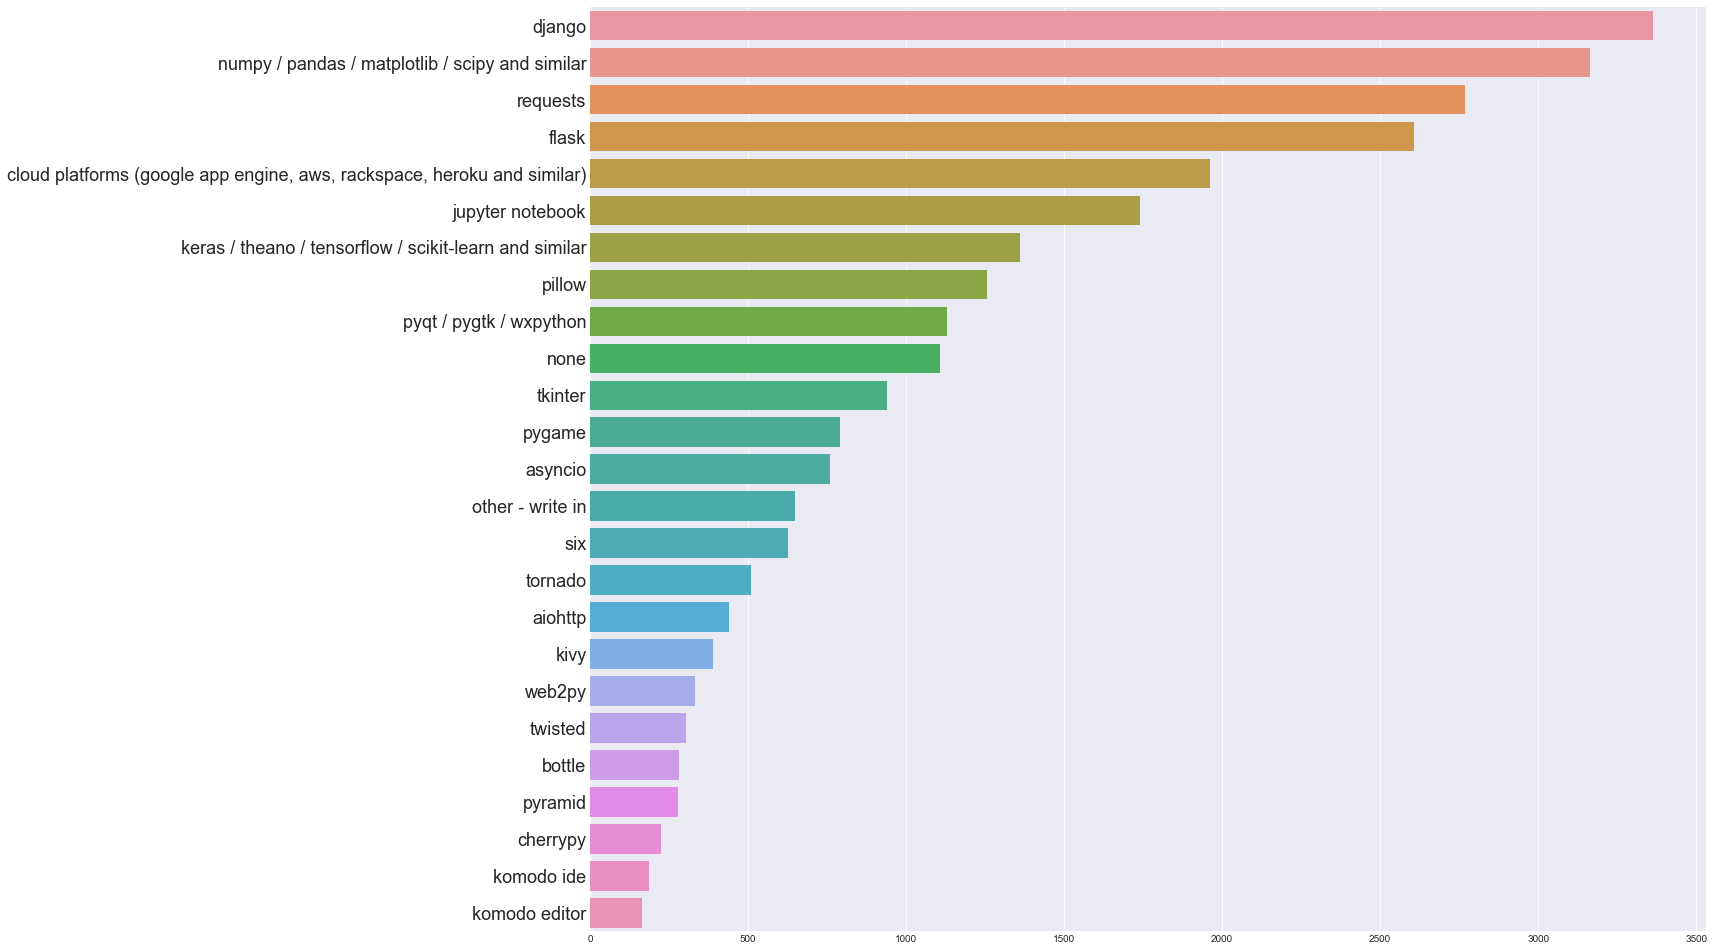

In [207]:
values = frameworks.count().sort_values(ascending=False).values
labels = [item.split(':')[0] for item in frameworks.count().sort_values(ascending=False).index]

plt.figure(figsize=(20, 17))
sns.barplot(x=values, y=labels, orient='h')
plt.yticks(fontsize=18)

## 常用框架中使用 Python 2 和 Python 3 的比例

In [208]:
python_ver = survey_df['which version of python do you use the most?']

In [30]:
def process_col(col):
    return pd.crosstab(index=python_ver, columns=col).iloc[:, 0]

In [31]:
# process_col(frameworks['django:what framework(s) do you use in addition to python?'])

which version of python do you use the most?
Python 2     841
Python 3    2522
Name: Django, dtype: int64

In [210]:
frameworks_pyver = frameworks.apply(lambda col: pd.crosstab(index=python_ver, columns=col).iloc[:, 0])
frameworks_pyver.columns = [item.split(':')[0] for item in frameworks.columns]
frameworks_pyver

,none,django,flask,tornado,bottle,web2py,numpy / pandas / matplotlib / scipy and similar,keras / theano / tensorflow / scikit-learn and similar,pillow,pyqt / pygtk / wxpython,...,requests,asyncio,kivy,six,aiohttp,other - write in,"cloud platforms (google app engine, aws, rackspace, heroku and similar)",jupyter notebook,komodo editor,komodo ide
which version of python do you use the most?,,,,,,,,,,,,,,,,,,,,,
Python 2,249,841,678,144,83,97,727,264,333,299,...,763,95,70,237,44,223,551,346,43,59
Python 3,859,2522,1929,366,199,235,2436,1096,924,830,...,2006,664,319,389,395,426,1409,1394,121,126


In [211]:
frameworks_pyver_ratio = frameworks_pyver / frameworks_pyver.sum(axis=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

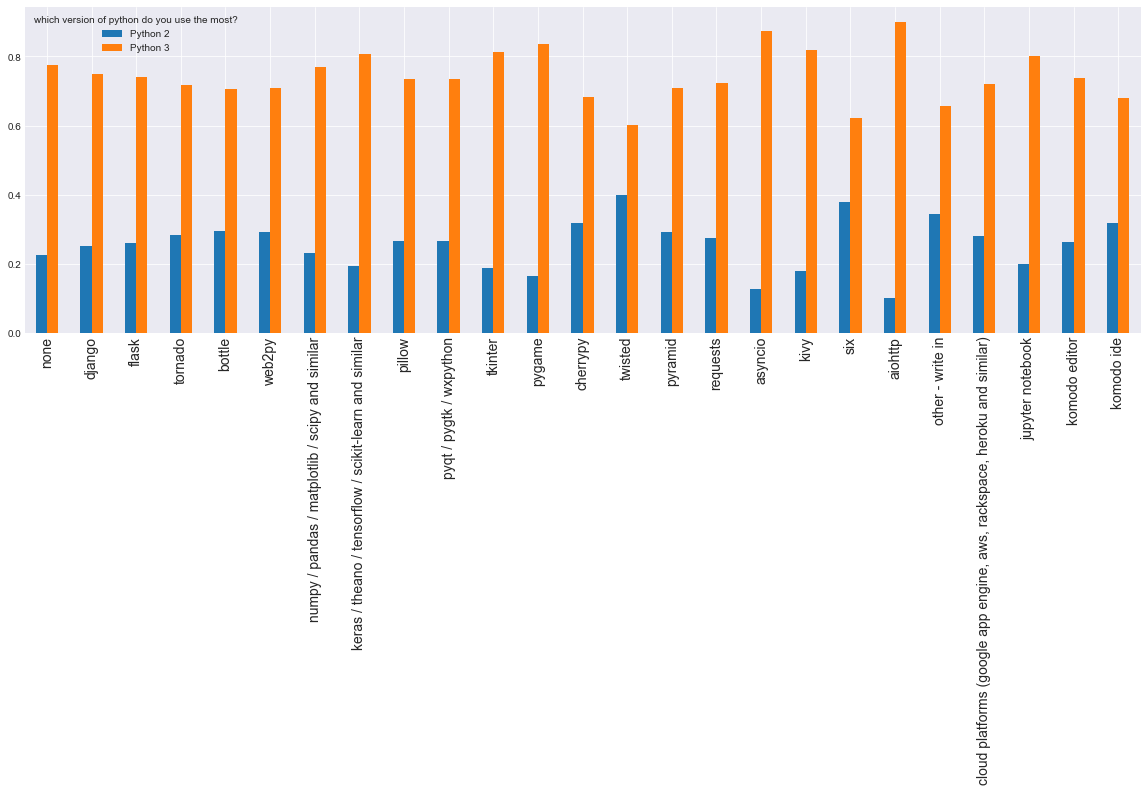

In [214]:
frameworks_pyver_ratio.T.plot(kind='bar')
plt.xticks(rotation=90, fontsize=14)

In [216]:
df = frameworks_pyver_ratio.stack().reset_index()
df.columns=['pyver', 'framework', 'value']
df.head()

,pyver,framework,value
0,Python 2,none,0.224729
1,Python 2,django,0.250074
2,Python 2,flask,0.260069
3,Python 2,tornado,0.282353
4,Python 2,bottle,0.294326


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text yticklabel objects>)

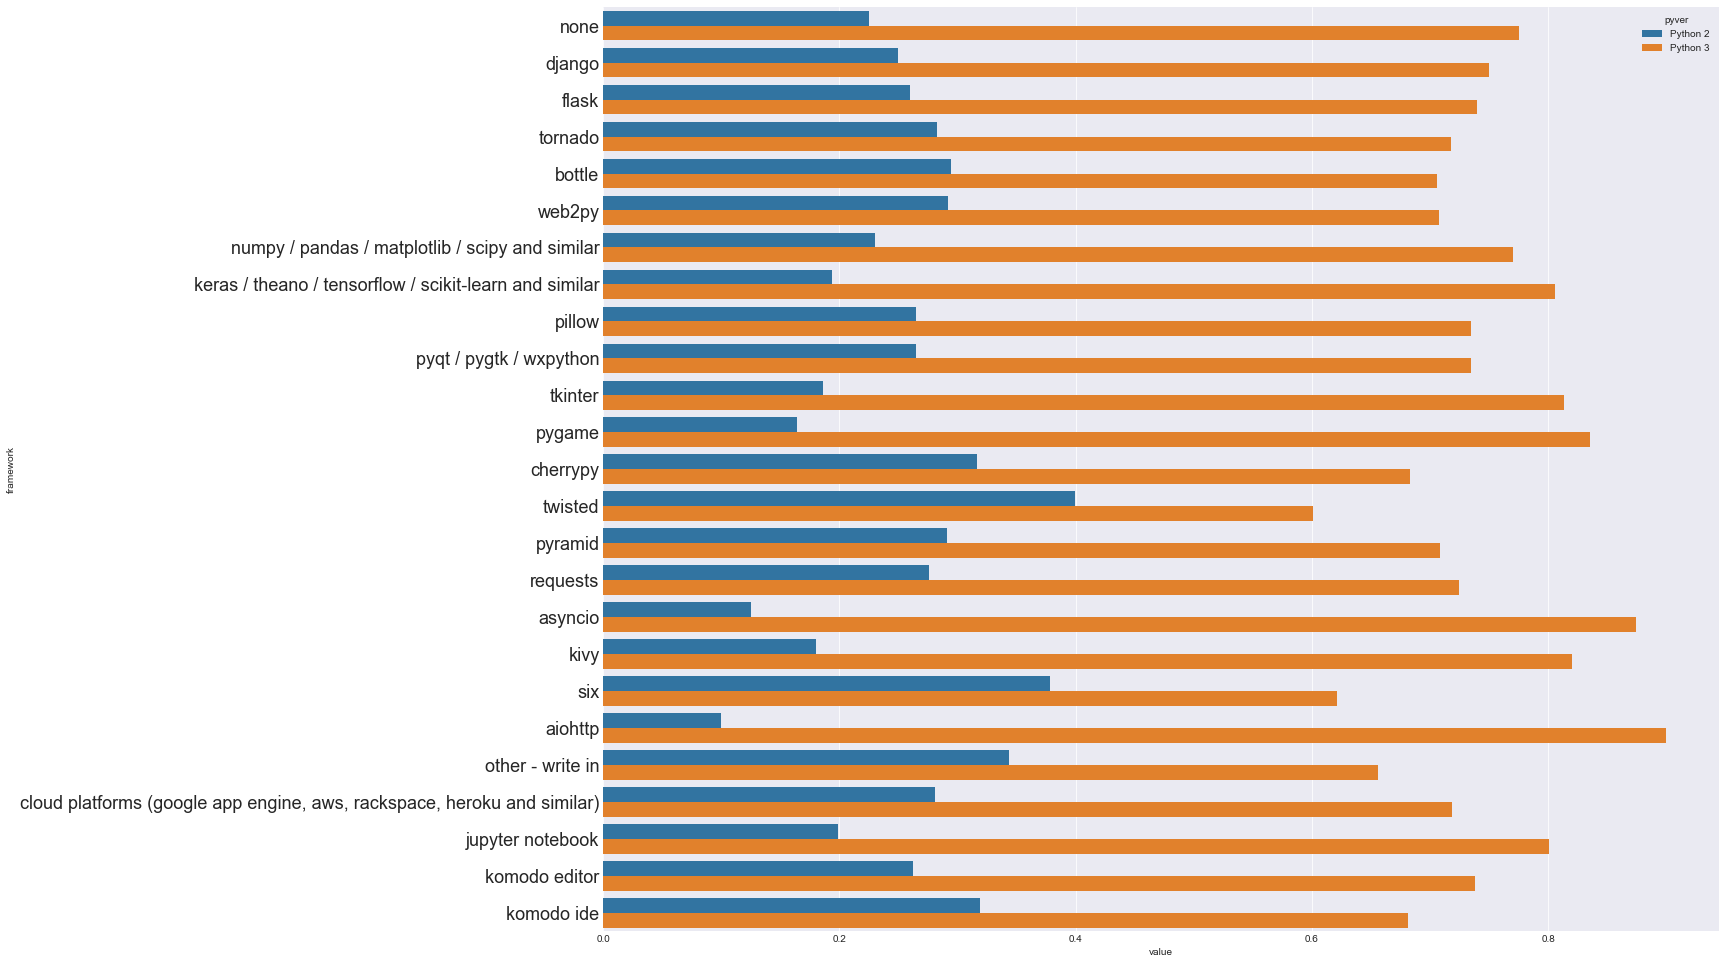

In [219]:
plt.figure(figsize=(20, 17))
sns.barplot(x='value', y='framework', hue='pyver', data=df, orient='h')
plt.yticks(fontsize=18)

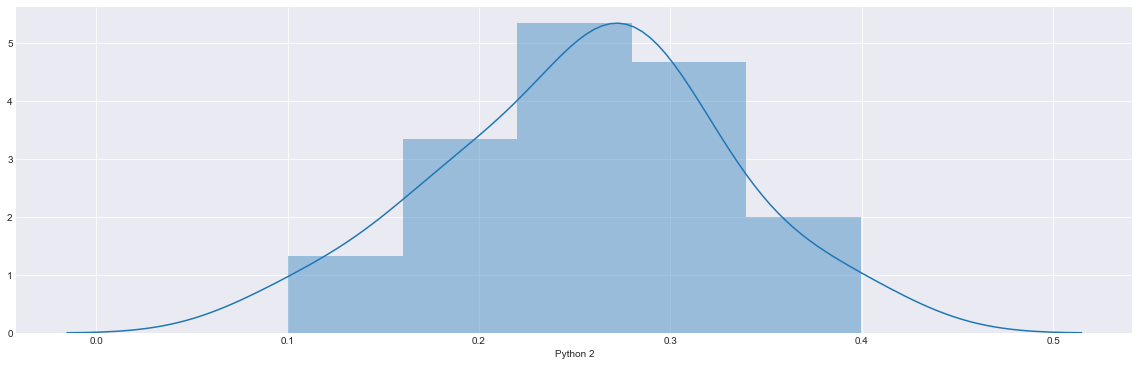

In [220]:
sns.distplot(frameworks_pyver_ratio.iloc[0, :], bins=5)

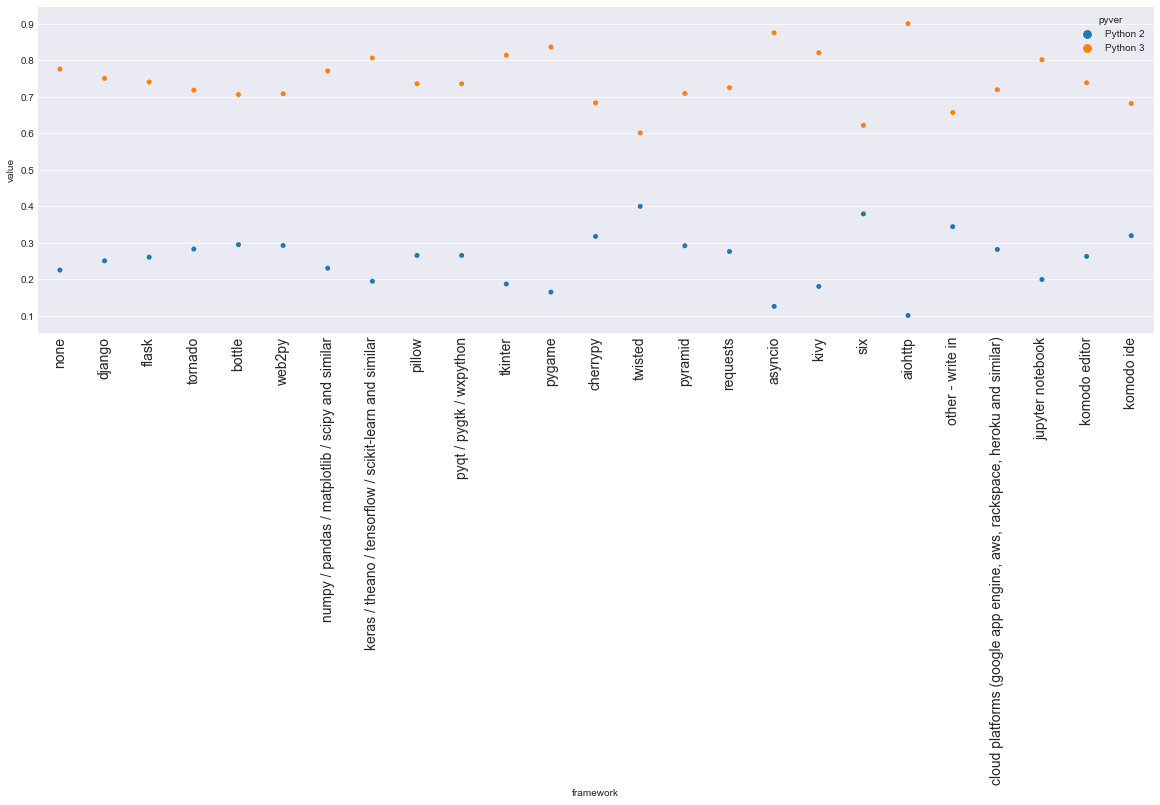

In [221]:
sns.stripplot(x='framework', y='value', hue='pyver', data=df)
plt.xticks(rotation=90, fontsize=14);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text yticklabel objects>)

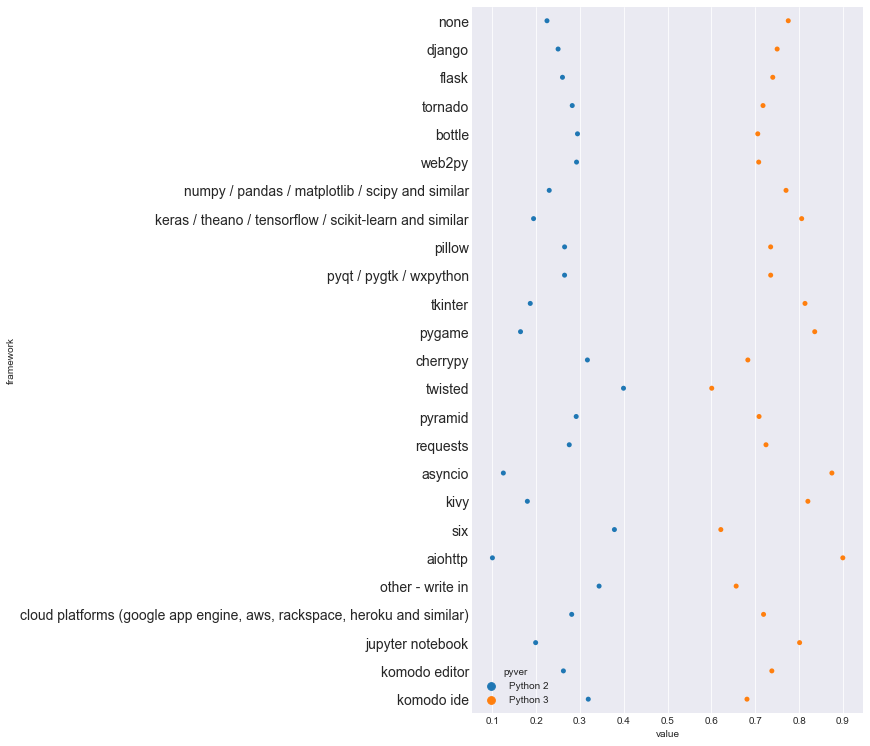

In [222]:
plt.figure(figsize=(7, 13))
sns.stripplot(x='value', y='framework', hue='pyver', data=df, orient='h')
plt.yticks(fontsize=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text yticklabel objects>)

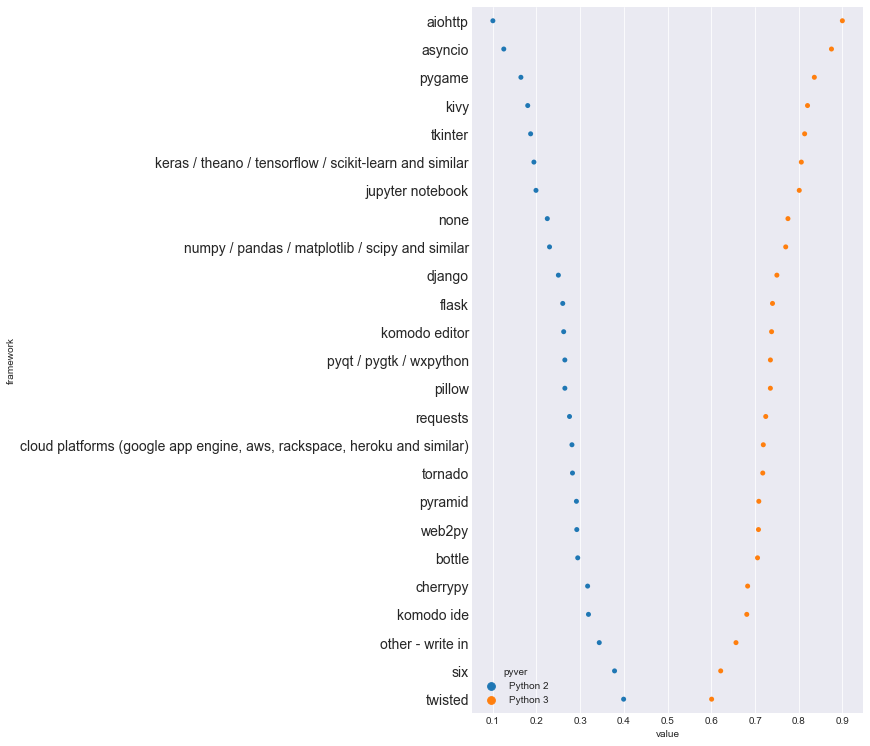

In [223]:
plt.figure(figsize=(7, 13))
sns.stripplot(x='value', y='framework', hue='pyver', data=df, order=frameworks_pyver_ratio.T['Python 3'].sort_values(ascending=False).index, orient='h')
plt.yticks(fontsize=14)

## 做数据分析和机器学习的人常用的框架？

In [224]:
cols = find_cols(survey_df, ['use', 'python', 'most'])
cols

['what do you use python for the most?',
 'which version of python do you use the most?']

In [226]:
uses = survey_df['what do you use python for the most?']
uses.head()

0    DevOps / System administration / Writing autom...
1                                      Web development
2                                      Web development
3                                                  NaN
4                                  Desktop development
Name: what do you use python for the most?, dtype: object

In [228]:
frameworks_uses = frameworks.apply(lambda col: pd.crosstab(index=uses, columns=col).iloc[:, 0])
frameworks_uses.columns = [item.split(':')[0] for item in frameworks_uses.columns]
frameworks_uses.head()

,none,django,flask,tornado,bottle,web2py,numpy / pandas / matplotlib / scipy and similar,keras / theano / tensorflow / scikit-learn and similar,pillow,pyqt / pygtk / wxpython,...,requests,asyncio,kivy,six,aiohttp,other - write in,"cloud platforms (google app engine, aws, rackspace, heroku and similar)",jupyter notebook,komodo editor,komodo ide
Computer graphics,47,20,15,7,3,3,47,11.0,23,34,...,16,3.0,9,3.0,1,8,16,10,5,3
Data analysis,161,424,395,73,38,49,926,397.0,159,200,...,376,85.0,44,94.0,46,81,279,594,27,25
Desktop development,56,151,114,17,13,21,156,28.0,79,193,...,119,20.0,51,26.0,8,41,61,71,13,15
DevOps / System administration / Writing automation scripts,95,271,289,41,33,28,230,58.0,83,106,...,343,97.0,20,64.0,53,68,227,113,24,23
Educational purposes,300,160,91,13,16,21,186,53.0,55,68,...,68,17.0,35,6.0,9,22,80,96,16,20


In [229]:
da_ml_frameworks_uses = frameworks_uses.loc[['Data analysis', 'Machine learning']]
da_ml_frameworks_uses.head()

,none,django,flask,tornado,bottle,web2py,numpy / pandas / matplotlib / scipy and similar,keras / theano / tensorflow / scikit-learn and similar,pillow,pyqt / pygtk / wxpython,...,requests,asyncio,kivy,six,aiohttp,other - write in,"cloud platforms (google app engine, aws, rackspace, heroku and similar)",jupyter notebook,komodo editor,komodo ide
Data analysis,161,424,395,73,38,49,926,397.0,159,200,...,376,85.0,44,94.0,46,81,279,594,27,25
Machine learning,61,239,186,48,19,31,462,416.0,90,88,...,163,40.0,25,37.0,22,33,139,297,10,7


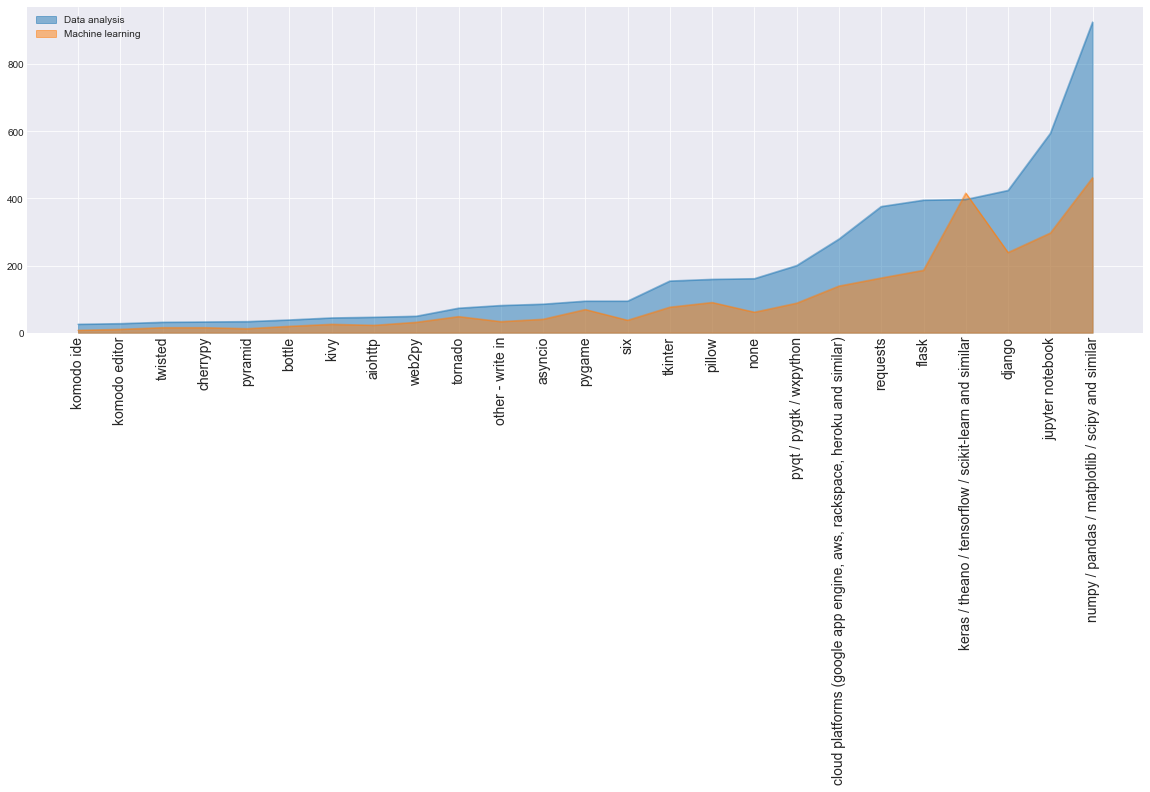

In [230]:
da_ml_frameworks_uses.T.sort_values(by='Data analysis').plot.area(stacked=False, alpha=0.5)
plt.xticks(range(da_ml_frameworks_uses.shape[1]), da_ml_frameworks_uses.T.sort_values(by='Data analysis').index, rotation=90, fontsize=14);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text yticklabel objects>)

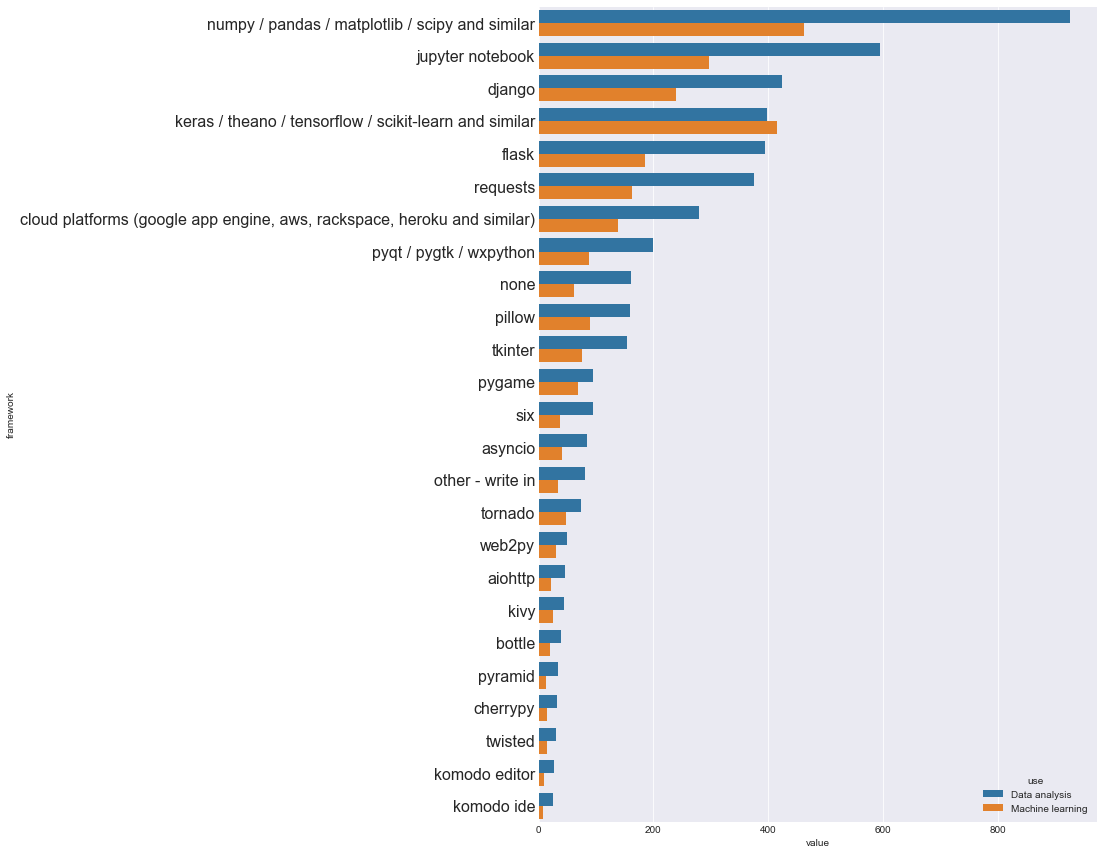

In [232]:
plt.figure(figsize=(10, 15))
df = da_ml_frameworks_uses.stack().reset_index()
df.columns = ['use', 'framework', 'value']
sns.barplot(x='value', y='framework', hue='use', data=df, orient='h', order=da_ml_frameworks_uses.T.sort_values(by='Data analysis', ascending=False).index)
plt.yticks(fontsize=16)

可以看到数据分析和机器学习从业者使用的框架大致差不多，只是在 keras、theano、tensorflow 和 scikit-learn 等机器学习库上差别较大，当然这也理所当然。

只是让我想不到的是 web 框架 Django 和 Flask 能够排的这么前。

## 公司规模大小和是否使用 Python 3 的关系？

In [233]:
cols = find_cols(survey_df, ['how', 'many', 'people', 'project'])
cols

['how many people are in your project team?']

In [234]:
team_scale = survey_df[cols[0]]
team_scale.head()

0    2-7 people
1    2-7 people
2           NaN
3           NaN
4    2-7 people
Name: how many people are in your project team?, dtype: object

In [235]:
team_scale.describe()

count           3635
unique             5
top       2-7 people
freq            2620
Name: how many people are in your project team?, dtype: object

In [236]:
team_scale.isnull().sum()

5871

In [237]:
team_pyver = pd.crosstab(team_scale, python_ver)
team_pyver = team_pyver.reindex(['2-7 people', '8-12 people', '13-20 people', '21-40 people', 'More than 40 people'])
team_pyver

which version of python do you use the most?,Python 2,Python 3
how many people are in your project team?,,
2-7 people,769,1553
8-12 people,183,327
13-20 people,65,105
21-40 people,25,42
More than 40 people,28,40


In [238]:
team_pyver.div(team_pyver.sum(axis=1), axis=0).sort_values(by='Python 3', ascending=False)

which version of python do you use the most?,Python 2,Python 3
how many people are in your project team?,,
2-7 people,0.331180,0.668820
8-12 people,0.358824,0.641176
21-40 people,0.373134,0.626866
13-20 people,0.382353,0.617647
More than 40 people,0.411765,0.588235


可以看到团队越小，使用 Python 3 的比例越高，可能这也是因为重构代价吧。

## 开发者年龄和是否使用 Python 3 的关系？

In [239]:
cols = find_cols(survey_df, ['age', 'range'])
cols

['could you tell us your age range?']

In [240]:
age = survey_df[cols[0]]
age.head()

0      60 or older
1            40-49
2            40-49
3    17 or younger
4            18-20
Name: could you tell us your age range?, dtype: object

In [241]:
age.describe()

count      9502
unique        7
top       21-29
freq       3717
Name: could you tell us your age range?, dtype: object

In [242]:
age.isnull().sum()

4

In [243]:
age.unique()

array(['60 or older', '40-49', '17 or younger', '18-20', '21-29', '30-39',
       '50-59', nan], dtype=object)

In [244]:
age_pyver = pd.crosstab(index=age, columns=python_ver)
age_pyver

which version of python do you use the most?,Python 2,Python 3
could you tell us your age range?,,
17 or younger,98,564
18-20,124,647
21-29,835,2378
30-39,632,1568
40-49,249,611
50-59,101,190
60 or older,25,86


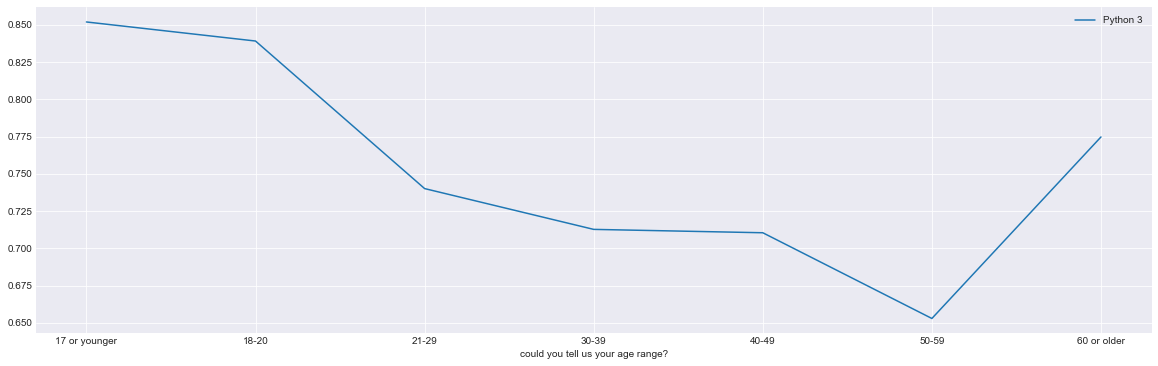

In [245]:
age_pyver.div(age_pyver.sum(axis=1), axis=0)['Python 3'].plot(label='Python 3')
plt.xticks(range(age_pyver.shape[0]), age_pyver.index);
plt.legend()

可以看到，随着年龄段的增长，Python 3 的使用比例在降低，但是到了 60 岁以上的时候反而提高了。。。

## 使用 Python 3 和 Python 2 的开发者的国别分布？

In [246]:
cols = find_cols(survey_df, ['country', 'live'])
cols

['what country do you live in?']

In [247]:
countries = survey_df[cols[0]]
countries.head()

0             Italy
1    United Kingdom
2            France
3             Spain
4            Israel
Name: what country do you live in?, dtype: object

In [248]:
countries.describe()

count              9502
unique              154
top       United States
freq               1638
Name: what country do you live in?, dtype: object

In [249]:
countries.isnull().sum()

4

In [250]:
survey_df.loc[countries.isnull()]

,is python the main language you use for your current projects?,none:what other language(s) do you use?,java:what other language(s) do you use?,javascript:what other language(s) do you use?,c/c++:what other language(s) do you use?,php:what other language(s) do you use?,c#:what other language(s) do you use?,ruby:what other language(s) do you use?,bash / shell:what other language(s) do you use?,objective-c:what other language(s) do you use?,...,technical support:which of the following best describes your job role(s)?,data analyst:which of the following best describes your job role(s)?,business analyst:which of the following best describes your job role(s)?,team lead:which of the following best describes your job role(s)?,product manager:which of the following best describes your job role(s)?,cio / ceo / cto:which of the following best describes your job role(s)?,systems analyst:which of the following best describes your job role(s)?,other - write in::which of the following best describes your job role(s)?,could you tell us your age range?,what country do you live in?
7898,Yes,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17 or younger,NaN
9478,"No, I use Python as a secondary language",NaN,NaN,JavaScript,NaN,PHP,NaN,NaN,Bash / Shell,Objective-C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9489,Yes,NaN,NaN,NaN,C/C++,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9499,Yes,NaN,NaN,NaN,C/C++,NaN,NaN,NaN,Bash / Shell,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


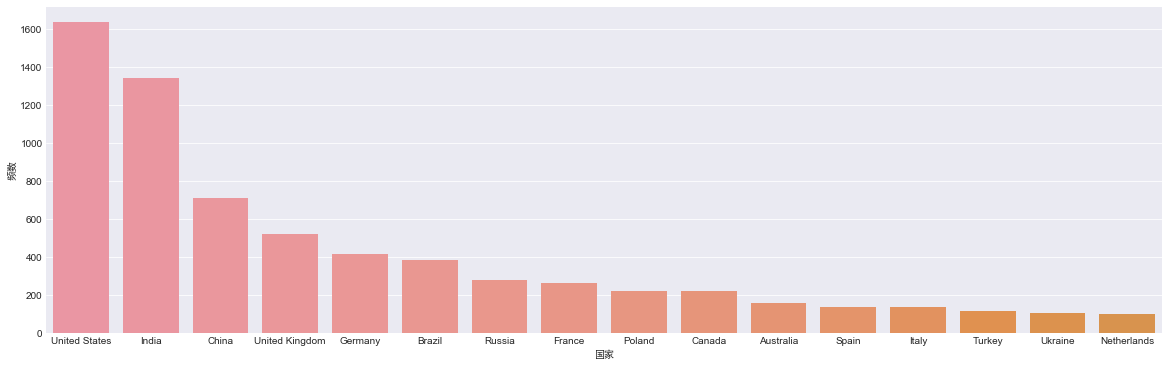

In [251]:
sns.countplot(countries, order=countries.value_counts().index)
plt.xlim(xmax=15.5);
plt.xlabel('国家', fontsize=18, fontproperties=chinese);
plt.ylabel('频数', fontsize=18, fontproperties=chinese);

In [252]:
countries_pyver = pd.crosstab(index=countries, columns=python_ver)
countries_pyver.head()

which version of python do you use the most?,Python 2,Python 3
what country do you live in?,,
Afghanistan,4,2
Albania,2,16
Algeria,7,16
Andorra,0,1
Antigua and Barbuda,0,2


In [253]:
top10_countries = countries_pyver.loc[countries.value_counts()[:10].index]
top10_countries = top10_countries.div(top10_countries.sum(axis=1), axis=0)
top10_countries

which version of python do you use the most?,Python 2,Python 3
United States,0.272979,0.727021
India,0.303810,0.696190
China,0.254733,0.745267
United Kingdom,0.220126,0.779874
Germany,0.219638,0.780362
Brazil,0.208571,0.791429
Russia,0.161572,0.838428
France,0.278970,0.721030
Poland,0.193069,0.806931
Canada,0.196891,0.803109


In [254]:
df = top10_countries.stack().reset_index()
df.columns = ['country', 'pyver', 'value']
df.head()

,country,pyver,value
0,United States,Python 2,0.272979
1,United States,Python 3,0.727021
2,India,Python 2,0.303810
3,India,Python 3,0.696190
4,China,Python 2,0.254733


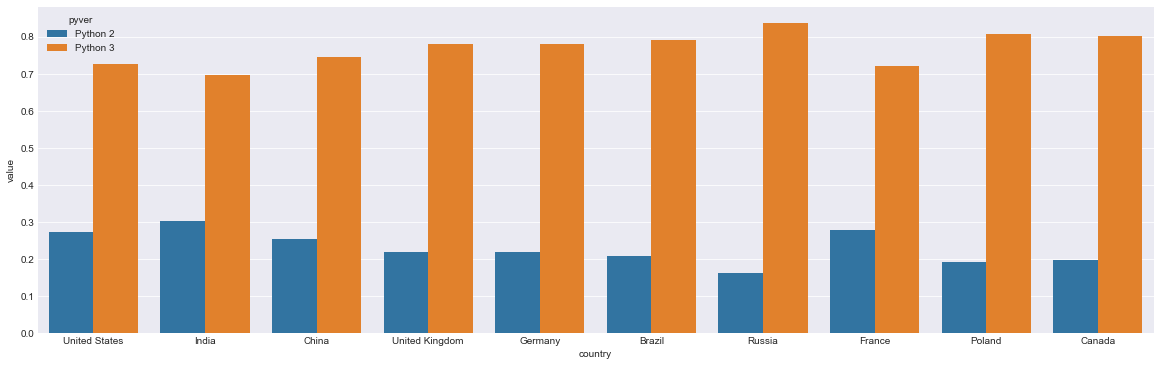

In [255]:
sns.barplot(x='country', y='value', hue='pyver', data=df)

In [256]:
countries_pyver_ratio = countries_pyver.div(countries_pyver.sum(axis=1), axis=0)
countries_pyver_ratio.head()

which version of python do you use the most?,Python 2,Python 3
what country do you live in?,,
Afghanistan,0.666667,0.333333
Albania,0.111111,0.888889
Algeria,0.304348,0.695652
Andorra,0.000000,1.000000
Antigua and Barbuda,0.000000,1.000000


Text(0.5,1,'Python 3 在所有国家的使用比例分布')

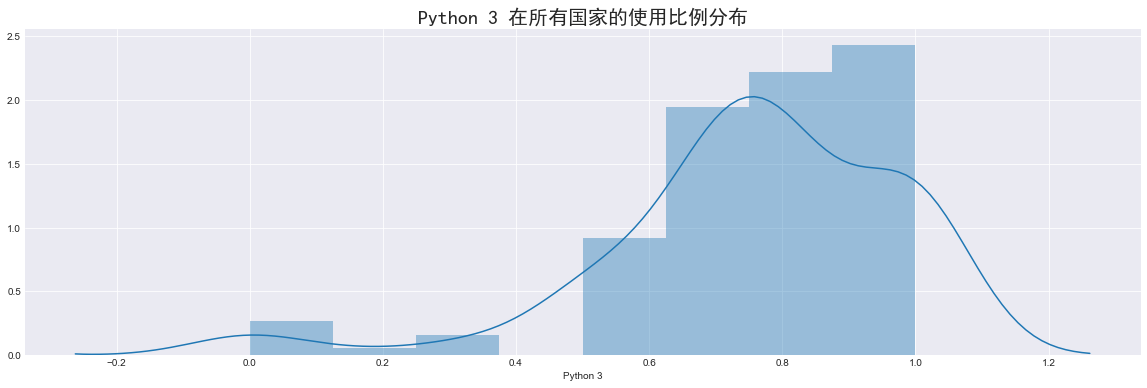

In [258]:
sns.distplot(countries_pyver_ratio['Python 3'])
plt.title('Python 3 在所有国家的使用比例分布', fontproperties=chinese, fontsize=20)

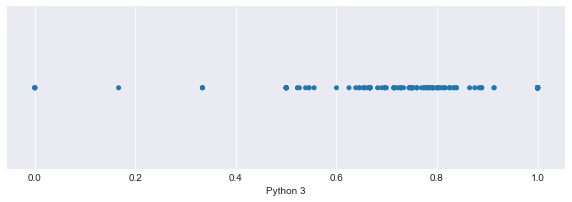

In [259]:
plt.figure(figsize=(10, 3))
sns.stripplot(x='Python 3', data=countries_pyver_ratio)

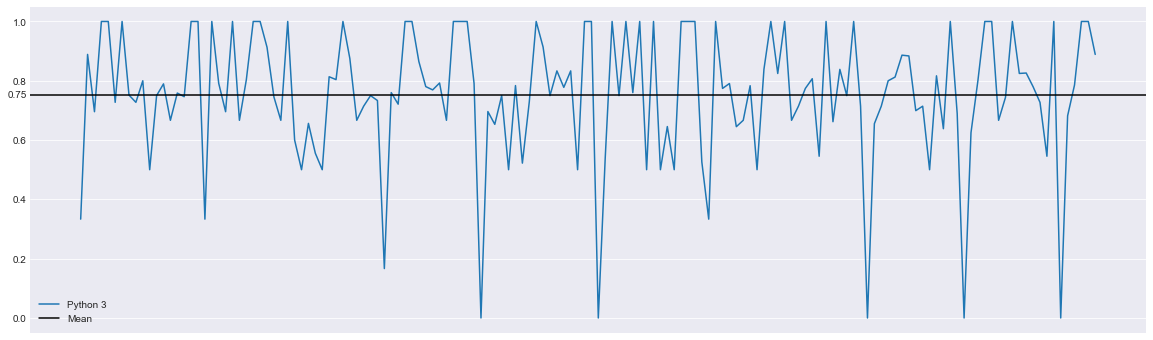

In [260]:
import matplotlib.transforms as transforms
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(countries_pyver_ratio['Python 3'])
ax.axhline(countries_pyver_ratio['Python 3'].mean(), c='k', label='Mean')
plt.xticks([]);
xmin, _ = plt.xlim()
ax.text(0, countries_pyver_ratio['Python 3'].mean(), round(countries_pyver_ratio['Python 3'].mean(), 2), 
        transform=transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData), 
        rotation='horizontal', 
        horizontalalignment='right', 
        verticalalignment='center');
ax.legend()

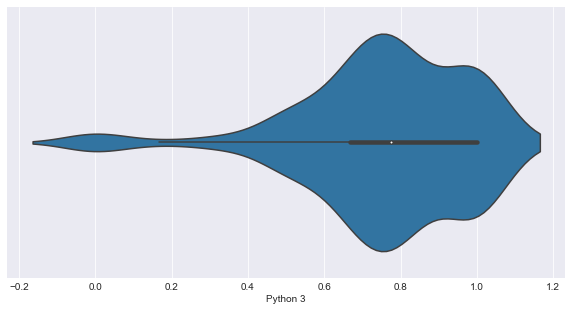

In [261]:
plt.figure(figsize=(10, 5))
sns.violinplot(countries_pyver_ratio['Python 3'])

In [262]:
countries_pyver_ratio['Python 3'].describe()

count    148.000000
mean       0.753568
std        0.224079
min        0.000000
25%        0.666667
50%        0.774194
75%        1.000000
max        1.000000
Name: Python 3, dtype: float64

In [263]:
countries_pyver_ratio['Python 2'].describe()

count    148.000000
mean       0.246432
std        0.224079
min        0.000000
25%        0.000000
50%        0.225806
75%        0.333333
max        1.000000
Name: Python 2, dtype: float64

In [264]:
init_notebook_mode(connected=True)

In [266]:
data = [ dict(
        type = 'choropleth',
        locations = countries_pyver_ratio.index,
        locationmode = 'country names', 
        z = countries_pyver_ratio['Python 3'] * 100,
        text = countries_pyver_ratio.index,
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            ticksuffix = '%',
            title = 'Percent'),
      ) ]

layout = dict(
    title = 'Python 3 in the world',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig, validate=False, filename='Python 3 in the world', image_height=1080, image_width=1920)